<a href="https://colab.research.google.com/github/KaishvaShah/EE610_ImageProcessing/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

(868, 1156, 3)


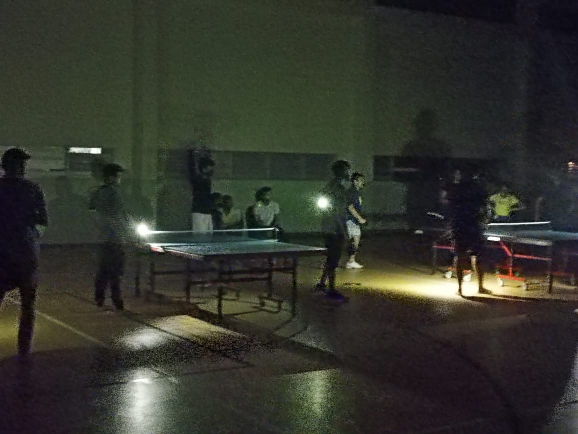

(434, 578, 3)


In [2]:
img=cv2.imread('/content/Q1.jpeg')
print(img.shape)
img1 = cv2.resize(img, (578, 434),
               interpolation = cv2.INTER_NEAREST)
#https://www.geeksforgeeks.org/image-resizing-using-opencv-python/ used to resize the original image of (868, 1156, 3) to (434, 578, 3) using opencv
cv2_imshow(img1)
print(img1.shape)

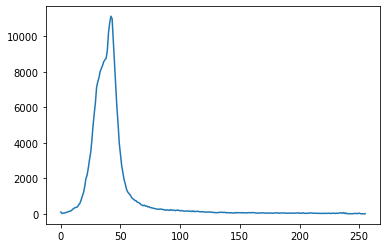

In [3]:
from matplotlib import pyplot as plt
#cv2.calcHist(images, channels, mask, histSize, ranges)
hist = cv2.calcHist([img1],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
#Plotting the histograms for the black and white image

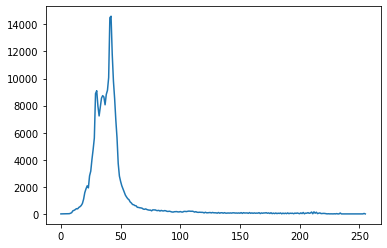

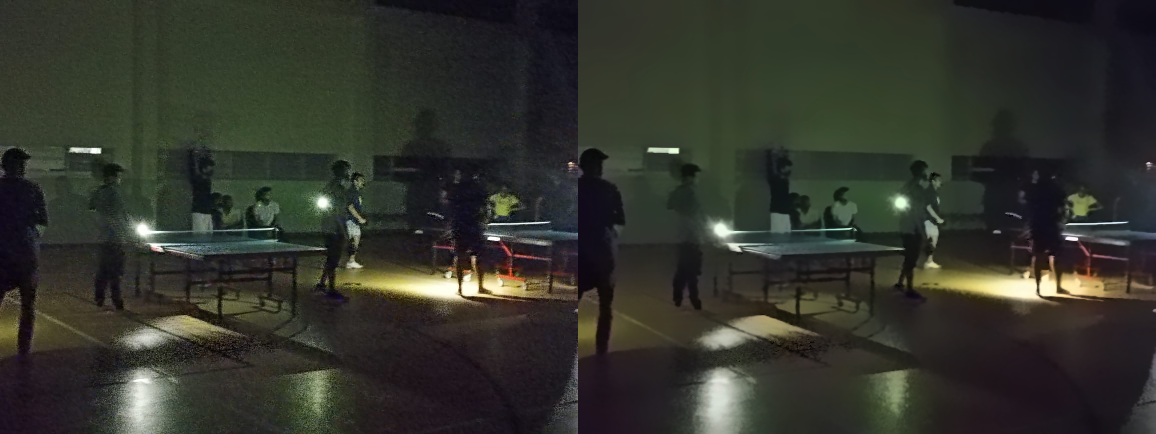

In [4]:
denoised = cv2.fastNlMeansDenoisingColored(img1, None, 15, 15, 3, 21) 
#https://docs.opencv.org/3.4/d5/d69/tutorial_py_non_local_means.html to get a denoised image for gaussian noise.
hist = cv2.calcHist([denoised],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
horizontal_concat = np.concatenate((img1, denoised), axis=1)
cv2_imshow(horizontal_concat)

As you can see the image has a much better histogram as we have removed the noise (gaussian) to some extent.

In [37]:
#from skimage import exposure
#ref = cv2.imread('/content/Q1_histogrammatch.jpg')
#multi = True if img.shape[-1] > 1 else False
#https://scikit-image.org/docs/stable/api/skimage.exposure.html
#skimage.exposure.match_histograms(image, reference, *, channel_axis=None, multichannel=False)
#matched = exposure.match_histograms(denoised, ref, multichannel=multi)
#print(matched)
#cv2_imshow(ref)
#cv2_imshow(matched)

# Question 2

(477, 320)


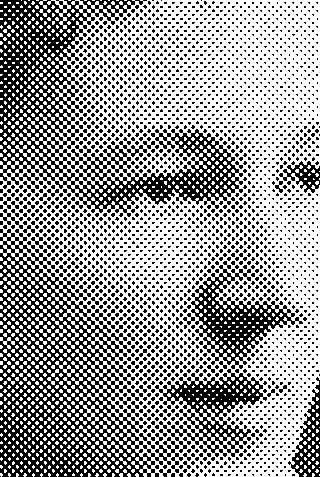

In [5]:
img=cv2.imread('/content/Q2.jpg',0)
print(img.shape)
cv2_imshow(img)

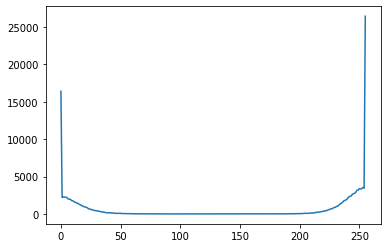

In [6]:
#cv2.calcHist(images, channels, mask, histSize, ranges)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
#Plotting the histograms for the black and white image

(477, 320, 2)


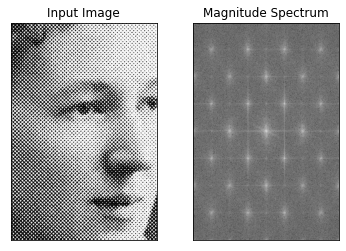

In [7]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT) 
#converting the image to the required type before applying cv2.dft on it.
#Gives 2 output channels. One is the real part and one is the imaginary part.
dft_shift = np.fft.fftshift(dft)
#To shift the zero-frequency component to the center of the spectrum.
print(dft_shift.shape)
#As discussed before, has size img,2 because it has 2 output channels, the real part and the imaginary part.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
#here we find the magnitude in decibel scale by giving 2 input channels, the real part and the imaginary part.
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

As we can see from the fourier transform of the image we have too many ink-dots that correspond to spots on the fourier transform image, we can actually take a low pass filter and see what that gives us.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


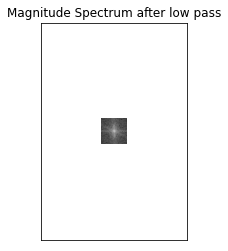

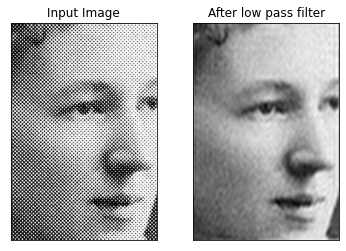

In [8]:
rows, cols = img.shape
crow,ccol = int((rows+1)/2) ,int((cols)/2)

mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
#we are creating a mask of the same size of the image by giving it value 1 in the low frequency region and 0 in the high frequency region.
fshift = dft_shift*mask
#once multiplied we have essentially removed the high frequency elements in the frequency domain as seen in the fourier transform image.
magnitude_spectrum = 20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum after low pass'), plt.xticks([]), plt.yticks([])
plt.show()
#applying inverse fourier transform on the new fourier transform.
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back1 = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back1, cmap = 'gray')
plt.title('After low pass filter'), plt.xticks([]), plt.yticks([])
plt.show()

Clearly this photo is now much better because of the low pass filtering

# Question 3

<class 'numpy.ndarray'>
(551, 680, 3)


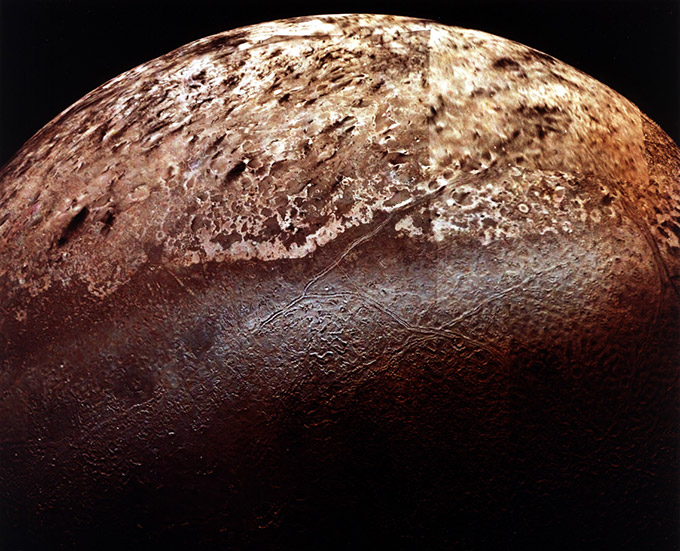

In [131]:
img=cv2.imread('/content/Q3.jpg')
print(type(img))
print(img.shape)
cv2_imshow(img)

In [135]:
img1=img[:,:,0]
img2=img[:,:,1]
img3=img[:,:,2]
print(img1.shape)

(551, 680)


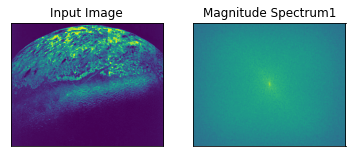

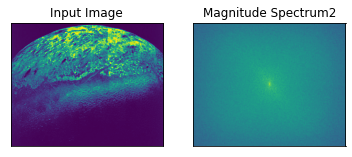

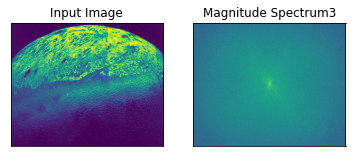

In [136]:
dft1 = cv2.dft(np.float32(img[ :, :, 0]),flags = cv2.DFT_COMPLEX_OUTPUT)
dft2 = cv2.dft(np.float32(img[ :, :, 1]),flags = cv2.DFT_COMPLEX_OUTPUT)
dft3 = cv2.dft(np.float32(img[ :, :, 2]),flags = cv2.DFT_COMPLEX_OUTPUT)
#converting the image to the required type before applying cv2.dft on it.
#Gives 2 output channels. One is the real part and one is the imaginary part.
dft_shift1 = np.fft.fftshift(dft1)
dft_shift2 = np.fft.fftshift(dft2)
dft_shift3 = np.fft.fftshift(dft3)
#To shift the zero-frequency component to the center of the spectrum.
#print(dft_shift1.shape)
#As discussed before, has size img,2 because it has 2 output channels, the real part and the imaginary part.
magnitude_spectrum1 = 20*np.log(cv2.magnitude(dft_shift1[:,:,0],dft_shift1[:,:,1]))
magnitude_spectrum2 = 20*np.log(cv2.magnitude(dft_shift2[:,:,0],dft_shift2[:,:,1]))
magnitude_spectrum3 = 20*np.log(cv2.magnitude(dft_shift3[:,:,0],dft_shift3[:,:,1]))


#converting the image to the required type before applying cv2.dft on it.
#Gives 2 output channels. One is the real part and one is the imaginary part.
dft_shift1 = np.fft.fftshift(dft1)
dft_shift2 = np.fft.fftshift(dft2)
dft_shift3 = np.fft.fftshift(dft3)
#To shift the zero-frequency component to the center of the spectrum.
#print(dft_shift.shape)
#As discussed before, has size img,2 because it has 2 output channels, the real part and the imaginary part.

#here we find the magnitude in decibel scale by giving 2 input channels, the real part and the imaginary part.
magnitude_spectrum1 = 20*np.log(cv2.magnitude(dft_shift1[:,:,0],dft_shift1[:,:,1]))
magnitude_spectrum2 = 20*np.log(cv2.magnitude(dft_shift2[:,:,0],dft_shift2[:,:,1]))
magnitude_spectrum3 = 20*np.log(cv2.magnitude(dft_shift3[:,:,0],dft_shift3[:,:,1]))
#here we find the magnitude in decibel scale by giving 2 input channels, the real part and the imaginary part.
plt.subplot(121),plt.imshow(img1)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum1)
plt.title('Magnitude Spectrum1'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(img2)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum2)
plt.title('Magnitude Spectrum2'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(img3)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum3)
plt.title('Magnitude Spectrum3'), plt.xticks([]), plt.yticks([])
plt.show()

# Question 4

<class 'numpy.ndarray'>
(852, 1445)


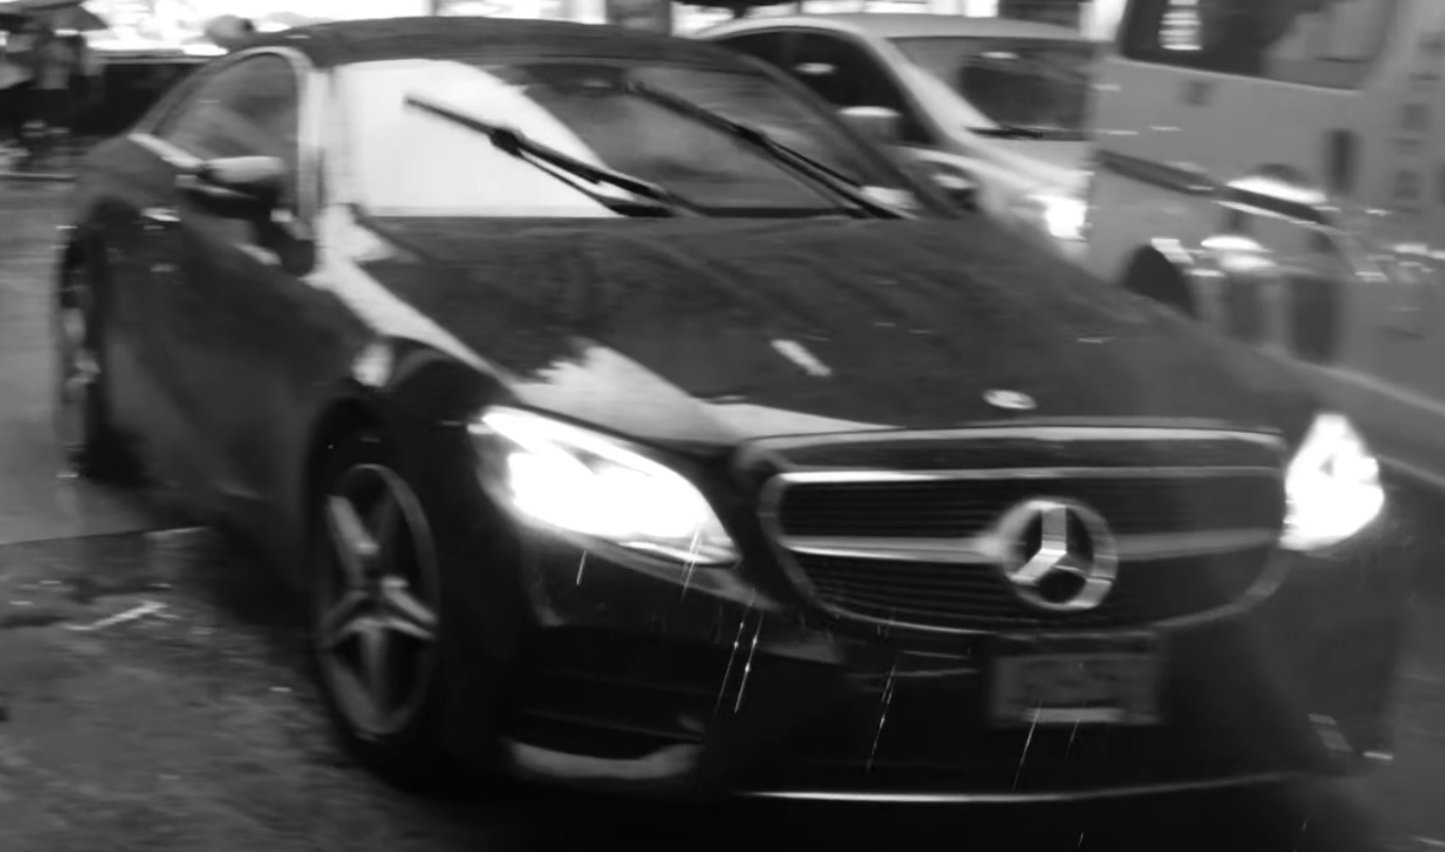

In [79]:
img=cv2.imread('/content/Q4.jpg',0)
print(type(img))
print(img.shape)
cv2_imshow(img)

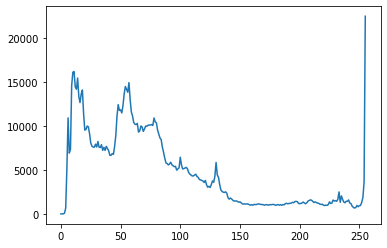

In [77]:
#cv2.calcHist(images, channels, mask, histSize, ranges)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
#Plotting the histograms for the black and white image

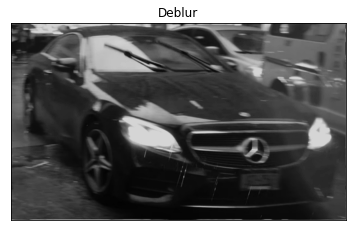

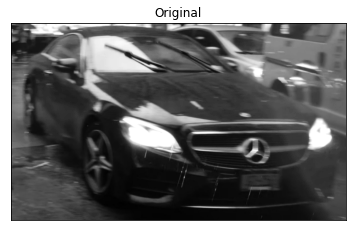

In [113]:
import scipy.fft


def wiener_filter(img, psf, K):
  psf /= np.sum(psf)
  dummy=np.copy(img) 
  dummy=scipy.fft.fft2(dummy)
  psf = scipy.fft.fft2(psf, s=img.shape)
  psf = np.conj(psf) / (np.abs(psf)**2+K)
  dummy = dummy*psf
  dummy= np.abs(scipy.fft.ifft2(dummy))
  return dummy
#for i in range(20):
psf = np.ones((5, 5))
tran1 =  wiener_filter(img, psf, K=0.5 )
plt.imshow(tran1, cmap='gray')
plt.title('Deblur'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

  #img=tran1

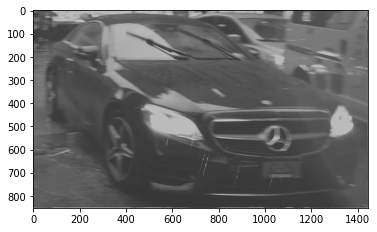

In [123]:
# Creating our sharpening filter
filter1 = np.array([[-1, -1, -1], [-1, 11, -1], [-1, -1, -1]])
# Applying cv2.filter2D function on our Logo image
sharpen_img_2=cv2.filter2D(tran1,-1,filter1)
plt.imshow(sharpen_img_2, cmap='gray')

# Question 5